In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

In [3]:
# https://dsp.stackexchange.com/questions/5979/image-classification-using-sift-features-and-svm

des_shapes = np.array([])
descriptors = np.array([np.ones(128)])

#no picture cards for now
for filename in os.listdir(os.getcwd()+str("\\Number Cards")):
    img = cv2.imread("Number Cards/"+str(filename), 0)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)

    des_shapes = np.append(des_shapes, des.shape[0])
    descriptors = np.vstack((descriptors, des))
        
descriptors = descriptors[1:]

In [4]:
print("AVG:", np.mean(des_shapes), "key points in a card")
print("Cluster descriptors into 180 groups")

AVG: 174.8 key points in a card
Cluster descriptors into 180 groups


In [5]:
#can play with num clusters
num_clusters = 200
clustering = KMeans(n_clusters=num_clusters).fit(descriptors)

In [6]:
def getFeatureVector(des, clustering):
    
    feature = np.zeros(num_clusters, dtype=int)
    for d in des:
        feature[clustering.predict([d])] +=1
        
    return feature

In [7]:
suits = np.array([])
features = np.array([np.ones(num_clusters, dtype=int)])

for filename in os.listdir(os.getcwd()+str("\\Number Cards")):
    img = cv2.imread("Number Cards/"+str(filename), 0)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)
    
    fv = getFeatureVector(des, clustering)
    
    features = np.vstack((features, fv))
    suits = np.append(suits, filename[-5])

features = features[1:]
enc = LabelEncoder().fit(["H", "D", "S", "C"])

enc_suits = enc.transform(suits)

In [8]:
card_num_data = np.hstack((features, np.reshape(enc_suits, (40, 1))))

[27  0  3]
[('C', 0), ('D', 1), ('H', 2), ('S', 3)]


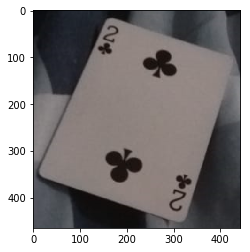

In [9]:
img = cv2.imread('home_img.PNG') #card_extract.png
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

preds = np.array([], dtype=int)

for i in range(0, 30):
    #can play with network structure and training time
    card_classifier = MLPClassifier(hidden_layer_sizes=(400, 200), max_iter=3000).fit(card_num_data[:, :num_clusters], 
                                                                                      np.reshape(card_num_data[:, num_clusters:], 
                                                                                                 (card_num_data.shape[0])))
    preds = np.append(preds, int(card_classifier.predict([getFeatureVector(des, clustering)])[0]))

print(np.bincount(preds))
print([(enc.classes_[i], enc.transform(enc.classes_)[i]) for i in range(4)])
plt.imshow(img);

In [26]:
#print(classification_report(np.reshape(test[:, 180:181], (test.shape[0])), card_classifier.predict(test[:, :180])))
# import pickle
# saved_classifier = pickle.dumps(card_classifier)

In [34]:
#train test split
# train = np.array(np.ones(181))
# test = np.array(np.ones(181))

# for i in range(0, 4):
#     cls = card_num_data[card_num_data[:, -1] == i]
#     cl_tr, cl_te = train_test_split(cls, train_size = 0.8, test_size = 0.2)
#     train = np.vstack((train, cl_tr))
#     test = np.vstack((train, cl_te))

# train = train[1:]
# test = test[1:]

# for i in range(0, 4):
#     train = np.vstack((train, train))
# train = shuffle(train)